In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [6]:
file_path = "C:/Users/parab/Desktop/Python/ML/smart_class_energy_data.csv"
df = pd.read_csv(file_path)
df.head()


,Num_Students,Outdoor_Temp,Time_of_Day,Humidity,Lights_On,Windows_Open,Fan_Speed,AC_Temp
0,33,34.714868,Morning,69.221654,1,0,2,26.911474
1,73,27.689434,Evening,75.267053,1,1,4,22.531882
2,73,38.544262,Afternoon,69.683302,0,0,3,23.523407
3,7,33.203330,Evening,89.243701,1,0,4,22.411541
4,35,33.565462,Evening,68.174341,0,0,1,26.139862


In [7]:
# Step 3: Check basic info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Num_Students  500 non-null    int64  
 1   Outdoor_Temp  500 non-null    float64
 2   Time_of_Day   500 non-null    object 
 3   Humidity      500 non-null    float64
 4   Lights_On     500 non-null    int64  
 5   Windows_Open  500 non-null    int64  
 6   Fan_Speed     500 non-null    int64  
 7   AC_Temp       500 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 31.4+ KB


,Num_Students,Outdoor_Temp,Humidity,Lights_On,Windows_Open,Fan_Speed,AC_Temp
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,49.218000,29.742121,61.601151,0.526000,0.490000,3.478000,22.984699
std,28.134491,5.708421,16.924468,0.499824,0.500401,1.201834,2.064986
min,5.000000,20.088729,30.145123,0.000000,0.000000,1.000000,20.006094
25%,25.000000,24.796337,47.449764,0.000000,0.000000,3.000000,21.298244
50%,46.000000,29.785890,62.974976,1.000000,0.000000,3.000000,22.656177
75%,74.000000,34.309672,75.977499,1.000000,1.000000,4.000000,24.200886
max,100.000000,39.930563,89.911184,1.000000,1.000000,5.000000,27.995065


In [4]:
# Step 4: Handle missing values (if any)
df = df.dropna()


In [5]:
# Step 5: Select independent and dependent variables
# ⚠️ Replace 'TargetColumn' with your actual dependent variable name (e.g., 'EnergyConsumption')
# Example:
# X = df[['Temperature', 'Humidity', 'Light']]
# y = df['EnergyConsumption']

# For now, let's print column names so you can choose:
print("Columns in dataset:", df.columns)


Columns in dataset: Index(['Num_Students', 'Outdoor_Temp', 'Time_of_Day', 'Humidity', 'Lights_On',
       'Windows_Open', 'Fan_Speed', 'AC_Temp'],
      dtype='object')


In [8]:
# Step 6: Define X (features) and y (target)
X = df.drop('Humidity', axis=1)
y = df['Humidity']


In [9]:
# 🔹 Convert all categorical (string) columns to numeric
# Automatically encode all non-numeric columns
X = pd.get_dummies(X, drop_first=True)

In [10]:
# Step 7: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Step 8: Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
# Step 9: Get coefficients and intercept
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 112.34274226997256
Coefficients: [-0.05001051 -0.43218973  1.63280623  0.1764007   2.85603795 -2.08880965
  3.15131966  2.83786316]


In [13]:
# Step 10: Predict and evaluate
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")


R² Score: 0.129
Mean Squared Error: 248.765


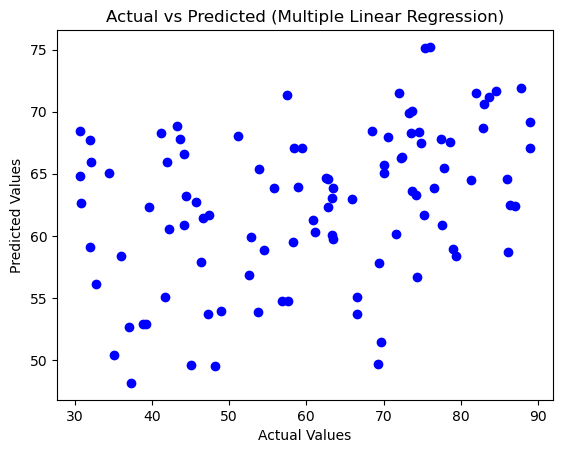

In [14]:
# Step 11: Visualization (optional)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Multiple Linear Regression)")
plt.show()


C:\SIDDHIML\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


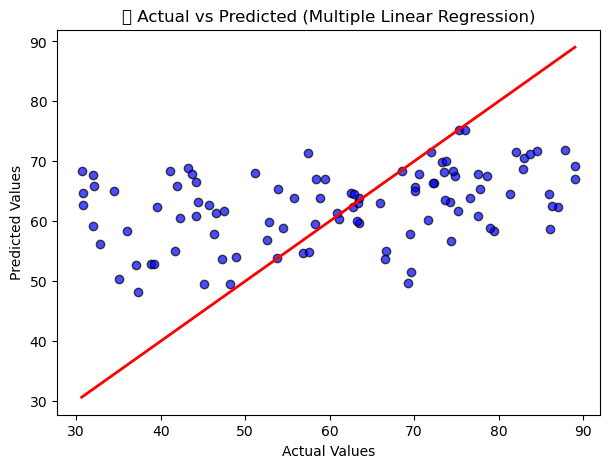

In [15]:
# Step 11: Plot Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("📈 Actual vs Predicted (Multiple Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.show()

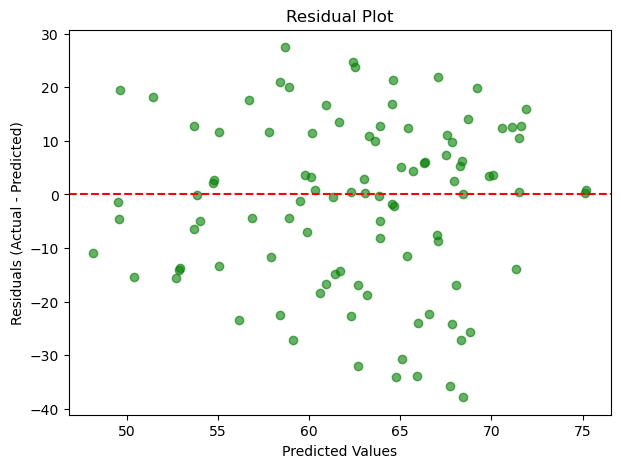

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()